## Week 01: Floating point and Python examples
### Math goals
- convert between binary and decimal
- express a number using a floating point system
- describe the impact of truncating vs rounding
- subtract binary numbers

### Python goals
- import
- define and use functions
- generate random numbers
- write `for` loops
- create an array
- vectorized code
- timing code
- write `while` loops
- create and append to a list
- plot

Import modules

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
rng = np.random.default_rng(seed=5)

# A "seed" makes the random numbers that are generated reproducible.
# We may ask you to use a seed so that we can more easily understand your work.

### Compare rounding and truncation

Look at the impact of rounding and of truncation on the mean value of a set of numbers.

#### Examples in the next cell
- function definition (and return)
- random number generation
- rounding to an integer
- truncating to an integer

#### Function names, variable names, and function documentation
From the Python style guide: https://peps.python.org/pep-0008/
- Function names should be lowercase, with words separated by underscores as necessary to improve readability. 
- Variable names follow the same convention as function names.

Documenting functions: https://peps.python.org/pep-0257/ and more on documenting them: https://realpython.com/documenting-python-code/#docstring-formats

#### Syntax notes
See the numpy documentation for information about random number generation. https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html


In [14]:
def compare_rounding_truncation(num_values):
    """Generate a sample. Return the mean, mean after rounding, mean after truncating

    Args:
        num_values -- the number of values in the sample
    
    Returns:
        sample_mean -- mean of the random numbers
        rounded_mean -- mean of the rounded numbers
        truncated_mean -- mean of the truncated numbers
    """
    values = rng.uniform(low=0.0,high=100.0,size=num_values)
    sample_mean = np.mean(values)
    rounded_mean = np.mean(np.round(values))
    truncated_mean = np.mean(np.floor(values))
    return sample_mean, rounded_mean, truncated_mean

[sample,rounded,truncated] = compare_rounding_truncation(10000)
print("sample mean:",sample)
print("round first:", rounded)
print("truncate first:", truncated)
print("sample mean - rounded:",sample - rounded)
print("sample mean - truncated:",sample - truncated)

# Why is the difference between the mean of the random 
#  numbers and the mean of the truncated numbers ~0.5?

sample mean: 50.52746681946089
round first: 50.5232
truncate first: 50.0288
sample mean - rounded: 0.004266819460887916
sample mean - truncated: 0.49866681946089386


### Create stock prices
Create a set of (synthetic) stock prices and then select some of the stocks at random.

#### Examples in next cell
- function definition (and return)
- write `for` loop
- create an array
- vectorized code

In [43]:
# Use a lognormal distribution for stock prices

def pick_stocks_use_loop(num_stocks, num_picks):
    """Generate a set of stocks and a list of random picks.

    Args:
        num_stocks -- the number of stocks to create
        num_picks -- the number of times to pick a stock
    
    Returns:
        stock_picks -- values of picked stocks
    """
    stock_list = rng.lognormal(mean=5,sigma=2, size=num_stocks)
    # Initialize the picks to zero and then fill the values in via the loop.
    stock_picks = np.zeros(num_picks)
    for pick in range(num_picks):
        stock_index = rng.integers(num_stocks)
        stock_picks[pick] = (stock_list[stock_index])
        
    return stock_picks

def pick_stocks_vectorized(num_stocks, num_picks):
    """Generate a set of stocks and a list of random picks.

    Args:
        num_stocks -- the number of stocks to create
        num_picks -- the number of times to pick a stock
    
    Returns:
        stock_list[pick_list] -- values of picked stocks
    """
    stock_list = rng.lognormal(mean=5,sigma=2, size=num_stocks)
    pick_list = rng.integers(num_stocks,size=num_picks)
    
    return stock_list[pick_list]

rng = np.random.default_rng(seed=5)
picks1 = pick_stocks_use_loop(60,10)
rng = np.random.default_rng(seed=5)
picks2 = pick_stocks_vectorized(60,10)
print(picks1)
print(picks2)

# What impact did re-initializing rng with a particular seed have?
# How do the two functions compare?

[2.69044686e+03 6.22146323e+02 2.32658442e+02 8.88135961e+01
 1.92153555e+04 3.64108931e+03 4.48880606e+02 2.32658442e+02
 1.61399913e+01 4.91415721e+01]
[2.69044686e+03 6.22146323e+02 2.32658442e+02 8.88135961e+01
 1.92153555e+04 3.64108931e+03 4.48880606e+02 2.32658442e+02
 1.61399913e+01 4.91415721e+01]


### Timing code
We can use `%%timeit` (a magic function from IPython: https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions) to profile code.

I compare the `for` version with the vectorized version by timing them both.  The vectorized version is about 10% faster on my machine

In [31]:
%%timeit
rng = np.random.default_rng(seed=5)
picks1 = pick_stocks_use_loop(60,10)

75.5 µs ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [29]:
%%timeit
rng = np.random.default_rng(seed=5)
picks2 = pick_stocks_vectorized(60,10)

68.1 µs ± 5.14 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Overflow
Explore overflow for `float16`

#### Examples in next cell
- write `while` loops
- create and append to a list
- plot

value: 1.0 exponent: 0.0
value: 2.0 exponent: 1.0
value: 4.0 exponent: 2.0
value: 8.0 exponent: 3.0
value: 16.0 exponent: 4.0
value: 32.0 exponent: 5.0
value: 64.0 exponent: 6.0
value: 128.0 exponent: 7.0
value: 256.0 exponent: 8.0
value: 512.0 exponent: 9.0
value: 1024.0 exponent: 10.0
value: 2048.0 exponent: 11.0
value: 4096.0 exponent: 12.0
value: 8190.0 exponent: 13.0
value: 16380.0 exponent: 14.0
value: 32770.0 exponent: 15.0
15.0
[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8190.0, 16380.0, 32770.0, inf]


Text(0, 0.5, '$2^x$')

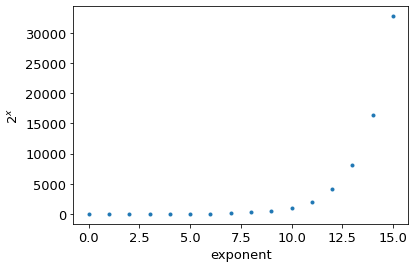

In [60]:
def find_overflow():
    """find number of bits before overflow
    
    Returns:
        k -- value of exponent before overflow
    """
    r = np.float16(1.0)
    
    # ~ is "not" and np.isinf checks for infinity/overflow
    
    rvalue_list = []
    rvalue_list.append(r)
    while ~np.isinf(r):
        k = np.log2(r)
        print("value:",r,"exponent:",k)
        r = np.float16(2*r)
        rvalue_list.append(r)
        
    return k, rvalue_list

k,rlist = find_overflow()
print(k)
print(rlist)

# Make the fonts a little bigger in the plot
plt.rc('font', size=13)
plt.plot(rlist,'.')
plt.xlabel('exponent')
plt.ylabel('$2^x$')

In [47]:
print(np.finfo(np.float16()))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------



#### Making sense of finfo
To understand the values in the call to `finfo`, refer to the documentation: https://numpy.org/doc/stable/reference/generated/numpy.finfo.html

`maxexp`
`int`
The smallest positive power of the base (2) that causes overflow.

Does this agree with what we found above?